In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
X_train_l = np.random.randint(0,10, size=(10000))
X_train_r = np.random.randint(0,10, size=(10000))

In [3]:
X1 = tf.placeholder(shape=[None], dtype=tf.int32)
Y1 = tf.placeholder(shape=[None], dtype=tf.int32)
X2 = tf.placeholder(shape=[None], dtype=tf.int32)
Y2 = tf.placeholder(shape=[None], dtype=tf.int32)

In [4]:
with tf.variable_scope("model"):
    Wfl1 = tf.get_variable(name="for1w", initializer=tf.random_normal([10,3]) )
    bfl1 = tf.get_variable(name="for1b", initializer=tf.random_normal([3]) )
    Wfl2 = tf.get_variable(name="for2w", initializer=tf.random_normal([3,10]) )
    bfl2 = tf.get_variable(name="for2b", initializer=tf.random_normal([10]) )

with tf.variable_scope("model", reuse=True):
    Wfr1 = tf.get_variable(name="for1w")
    bfr1 = tf.get_variable(name="for1b")
    Wfr2 = tf.get_variable(name="for2w")
    bfr2 = tf.get_variable(name="for2b")

In [5]:
X_oh_1 = tf.one_hot(X1, depth=10)
X_oh_2 = tf.one_hot(X2, depth=10)

emb1 = tf.nn.xw_plus_b(X_oh_1, Wfl1, bfl1)
act1  = tf.nn.sigmoid(emb1)

emb2 = tf.nn.xw_plus_b(X_oh_2, Wfr1, bfr1)
act2 = tf.nn.sigmoid(emb2)

mid1 = tf.nn.xw_plus_b(act1, Wfl2, bfl2)
out1 = tf.nn.sigmoid(mid1)
mid2 = tf.nn.xw_plus_b(act2, Wfr2, bfr2)
out2 = tf.nn.sigmoid(mid2)

loss_l = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out1, labels=Y1)
loss_r = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out2, labels=Y2)

cos = (1 + tf.matmul(act1, tf.transpose(act2)) / (tf.norm(act1) * tf.norm(act2)))/2.0
loss_cross = ((X1<=3) == (X2<=3))*tf.log(cos) + ((X1<=3) != (X2<=3))*tf.log(1 - cos)

train_step = tf.train.AdamOptimizer(1e-4).minimize(loss_l + loss_r + loss_cross)


In [6]:
batch_size = 100
num_step = int(10000/batch_size)
sess = tf.Session()

In [7]:
sess.run(tf.global_variables_initializer())
for i in range(1000):
    np.random.shuffle(X_train_l)
    np.random.shuffle(X_train_r)
    for j in range(num_step):
        train_step.run(session=sess, feed_dict={X1: X_train_l[j*100:(j+1)*100], X2: X_train_r[j*100:(j+1)*100], Y1:X_train_l[j*100:(j+1)*100], Y2:X_train_r[j*100:(j+1)*100]})

In [8]:

output = act1.eval(session=sess, feed_dict={X1:np.asarray([0,1,2,3,4,5,6,7,8,9])})
output

array([[  9.99906540e-01,   6.73610542e-04,   9.99913216e-01],
       [  7.81713128e-01,   9.99851823e-01,   9.99968767e-01],
       [  9.99866009e-01,   9.99939084e-01,   3.37721896e-04],
       [  1.01909711e-04,   9.96086121e-01,   1.48426625e-04],
       [  9.56780495e-05,   4.12704706e-01,   1.12812825e-01],
       [  1.54932874e-04,   9.99887109e-01,   9.99946237e-01],
       [  9.99916077e-01,   9.99927998e-01,   1.60418349e-04],
       [  9.99982715e-01,   1.66893849e-04,   9.99883413e-01],
       [  6.06293678e-01,   9.00353698e-05,   3.54924775e-03],
       [  1.18329714e-03,   2.30800160e-05,   7.20687509e-01]], dtype=float32)

In [9]:
colors = ['green', 'green', 'green', 'green', 'red', 'red','red', 'red']
names = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
# for i in range(output.shape[0]):
#     asm = np.sum(output[i])
#     output[i] = output[i] - (asm/3.0)

In [10]:
# output

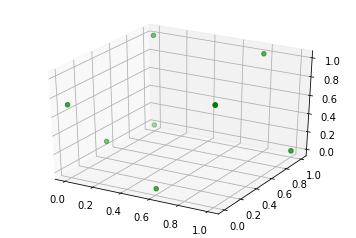

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( xs=output[:,0], ys=output[:,1], zs=output[:,2], c=colors)

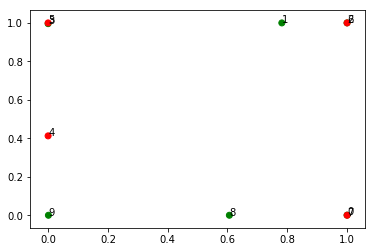

In [12]:
plt.scatter( x=output[:,0], y=output[:,1],  c=colors)
for i in range(10):
    plt.annotate(names[i], (output[i,0], output[i,1]))

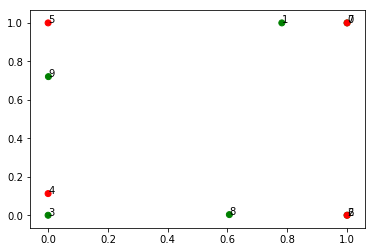

In [13]:
plt.scatter(x=output[:,0], y=output[:,2], c=colors)
for i in range(10):
    plt.annotate(names[i], (output[i,0], output[i,2]))

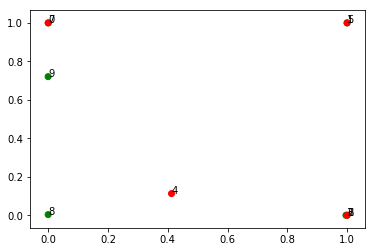

In [14]:
plt.scatter( x=output[:,1], y=output[:,2], c=colors)
for i in range(10):
    plt.annotate(names[i], (output[i,1], output[i,2]))

In [15]:
sess.close()